In [1]:
import pickle
import xarray as xr
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
import sys
sys.path.append('./../Scripts/core/')
import inv_flux as invf

In [3]:
CAMS = pickle.load(open('./../Output/output_raw/output_all/CAMS_all/year.pik', 'rb'))
Rayner = pickle.load(open('./../Output/output_raw/output_all/Rayner_all/year.pik', 'rb'))
CTRACKER = pickle.load(open('./../Output/output_raw/output_all/CTRACKER_all/year.pik', 'rb'))
JENA_s76 = pickle.load(open('./../Output/output_raw/output_all/JENA_s76_all/year.pik', 'rb'))
JENA_s85 = pickle.load(open('./../Output/output_raw/output_all/JENA_s85_all/year.pik', 'rb'))
JAMSTEC = pickle.load(open('./../Output/output_raw/output_all/JAMSTEC_all/year.pik', 'rb'))

In [4]:
def extract_uptake(model, sink, region):
    
    """
    sink: Land or Ocean
    region: Earth, South, Tropical or North
    """
    
    uptake = f"{region}_{sink}"
    
    x = [year.year for year in model.time.values]
    y = model[uptake].values
    
    return (x,y)

In [5]:
extract_uptake(JENA_s76, "Land", "North");

In [6]:
def plot_all(model, sink):
    N = extract_uptake(model, sink, "North")
    S = extract_uptake(model, sink, "South")
    T = extract_uptake(model, sink, "Tropical")
    E = extract_uptake(model, sink, "Earth")

    plt.figure(figsize=(18, 12))
    plt.plot(N[0], N[1])
    plt.plot(S[0], S[1])
    plt.plot(T[0], T[1])
    plt.plot(E[0], E[1], linewidth=5)
    plt.legend(["North", "South", "Tropical", "Earth"])


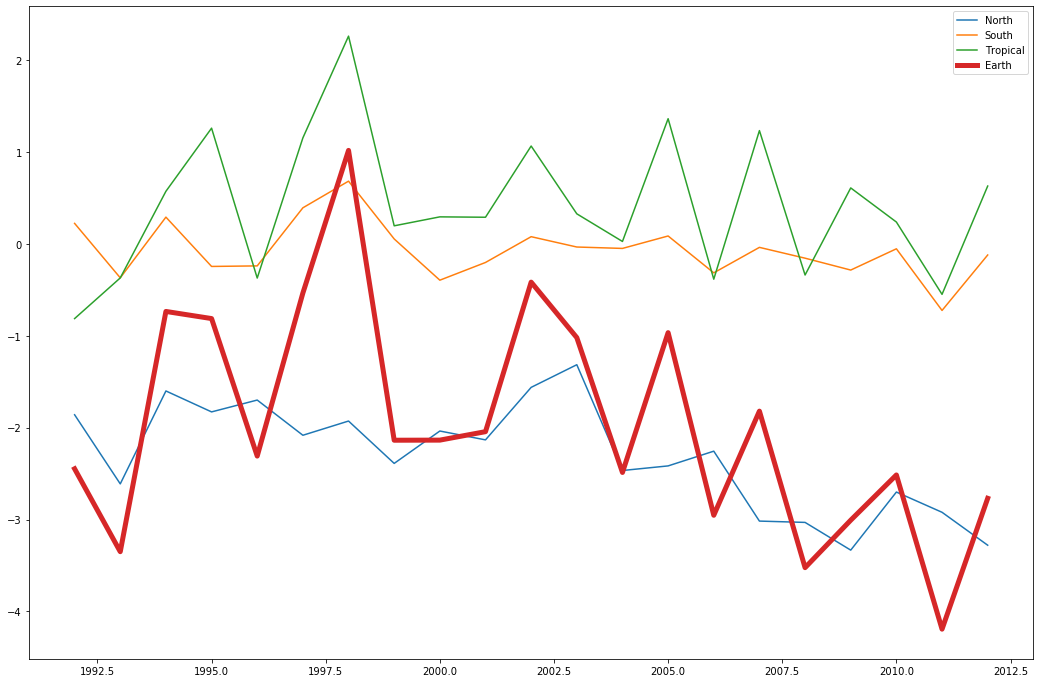

In [7]:
plot_all(Rayner, "Land")

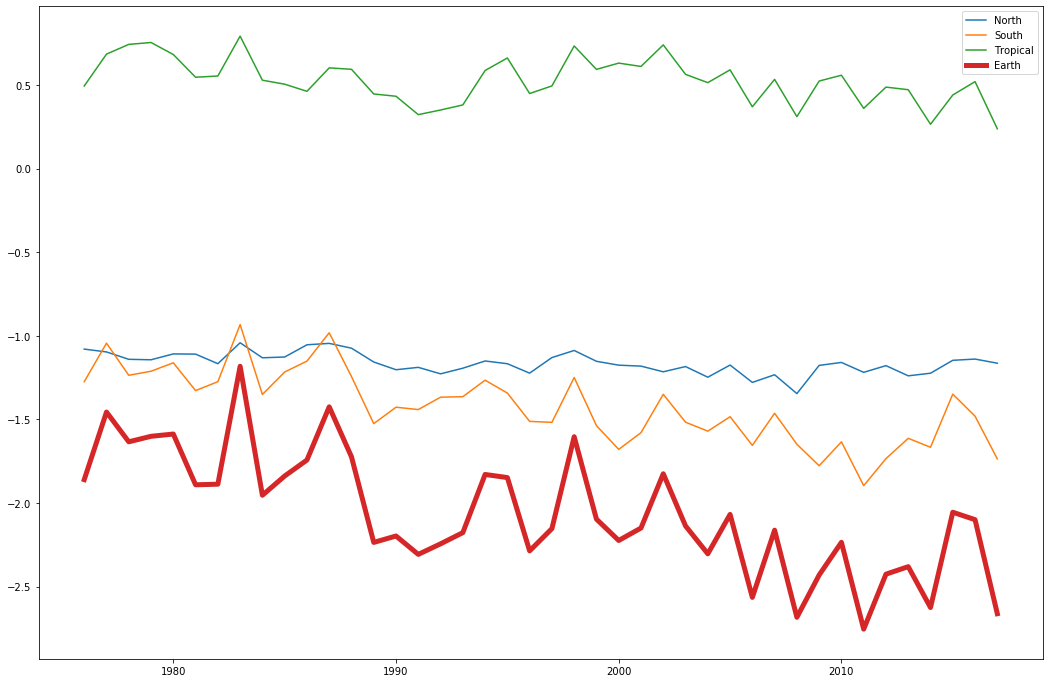

In [8]:
plot_all(JENA_s76, "Ocean")

# INVF

Since analysis functions take in any variable and not just Earth variables, then we can easily access them for the regional fluxes.